# Project: No-show appointments Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Analytics is being used to answer and predict various questions. Right from understanding how the product is performing in the market to determining the demand of the product and further improvements can be done by understanding and analyzing the data. Every data point we collect adds more information to our analysis. Here, I have used the No-show appointment data which has 100k medical appointments records in Brazil. 


> The dataset can be accessed from https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv


> The data set gives information about the patient, like the gender, age and their medical condition along with the whether the patient showed up for the appointment as scheduled or not? The data set contains 100K observations and 12 explanatory variables involved in assessing whether the patient will be no-show.

> The variables in the dataset are self-explainatory. No-show says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the csv
data = pd.read_csv('NoShowAppt.csv')

In [3]:
#See the dataset
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

> Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data collection methods are loosely controlled and hence data collected has a wide range, impossible combinations and missing values. The quality of data affects the various analysis and learning of the model.


### General Properties
> Knowing the data type is the first step towards understanding the data. 

In [4]:
#knowing the data type
data.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>ScheduledDay and AppointmentDay are object data type. Converting them to datetime/timestamp can help us in further analysis process. Pandas to_datetime function helps us in converting the object data type to appropriate timestamp data type 

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

data.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

>Note: I tried looking up for difference between datetime64[ns] and datetime but could not find the most appropriate explaination. Can you please provide a good link to refer for datetime functions

In [6]:
#describe the dataset
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


>Age discrepancy in the data can be observed. The minimum age is -1 whereas the maximum age in the dataset is 115. Let's work through the age discrepancy first.

In [7]:
#extract the rows with age -1 from the data
data_age = data[data['Age'] == -1]
data_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


>We can either drop this record for the analysis or replace the value of the age with mode or mean of age in the dataset. Since there is no enough evidence to support replacing the value, I will drop the row

In [8]:
#dropping the rows with age -1
data = data[data.Age != -1]

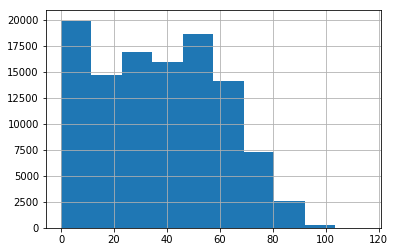

In [9]:
#understanding the distribution of the age 
data.Age.hist()

>The age distribution is right skewed. We can observe that the infants have marked the maximum number of scheduled appointment to the hospitals. 

In [10]:
#extract rows with age>100
data_age_greater = data[data['Age'] >= 100]
data_age_greater

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03 09:14:53,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16 09:17:44,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08 14:29:17,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30 09:44:51,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No
79270,9.739430e+12,5747809,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
79272,9.739430e+12,5747808,M,2016-05-30 16:21:56,2016-05-31,100,TABUAZEIRO,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31 10:19:49,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No
92084,5.578313e+13,5670914,F,2016-05-06 14:55:36,2016-06-03,100,ANTÔNIO HONÓRIO,0,0,0,0,0,1,No
97666,7.482346e+14,5717451,F,2016-05-19 07:57:56,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No


>Though these are outliers for the analysis, I will keep them for now and decide whether to drop or not in the later stage of the analysis. 

>Looking further into the data, Handcap is described as either 0 or 4. We need more information on this variable to use it for any analysis. Due to lack of information, I will not be performing any analysis using Handcap variable.

In [11]:
#extract rows with handcap=4
data_handcap = data[data['Handcap'] == 4]
data_handcap

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
91820,9.251878e+12,5789549,M,2016-06-08 15:14:00,2016-06-08,15,DA PENHA,0,0,0,0,4,0,No
98538,4.972463e+14,5760621,M,2016-06-01 15:11:25,2016-06-03,19,SÃO PEDRO,0,0,0,0,4,0,No
104268,7.581895e+14,5697136,F,2016-05-13 15:01:17,2016-06-02,9,ITARARÉ,0,0,0,0,4,1,Yes


>To help us in the analysis, I will extract the month and year to understand the behavior of no-show appointments. 

In [12]:
#add a column indicating year of the appointment day
data['year'] = pd.DatetimeIndex(data['AppointmentDay']).year
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016


In [13]:
#add a column indicating month of the appointment day
data['month'] = pd.DatetimeIndex(data['AppointmentDay']).month
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4


In [14]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,year,month
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.0,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,2016.0,5.210041
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.0,0.473776
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,4.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.0,5.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,5.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,2016.0,6.000000


>We can observe that all the records are from April 2016 to June 2016. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Which age group has maximum appointments and which age group has maximum no-shows? 


>Creating age bins to understand the behavior of problems and no-show within the patients of similar age group.

In [15]:
#Creating age bins
bin_edges = [ -1, 2, 4, 12, 18, 35, 50, 115] 

In [16]:
#Naming the age bins
bin_names = [ 'infant', 'toddler', 'kid', 'teen', 'young_adult', 'middle-aged_adult', 'old_adult' ] 

In [17]:
#create named age bins
data['age_group'] = pd.cut(data['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,old_adult
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,old_adult
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,old_adult
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,kid
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,old_adult


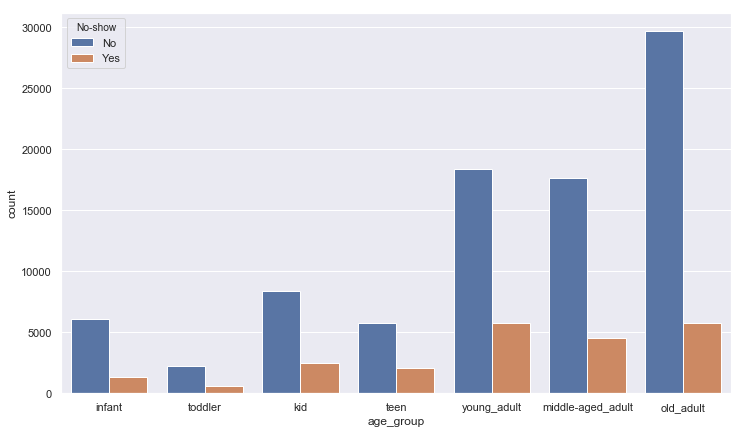

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age_group",hue='No-show', data=data)
fig = plt.gcf()
fig.set_size_inches( 12, 7)

In [19]:
#count distinct patient in each age group
count_unique_patient = data.groupby("age_group")["PatientId"].nunique()

In [20]:
#Make it a dataframe
count_unique_patient = pd.DataFrame(count_unique_patient).reset_index()

In [21]:
#renaming columns of the dataframe
count_unique_patient.columns=['age_group', 'number_of_patient']
count_unique_patient

,age_group,number_of_patient
0,infant,4593
1,toddler,1809
2,kid,6294
3,teen,4455
4,young_adult,13343
5,middle-aged_adult,11890
6,old_adult,20012


### Conclusions for first question: 
>We have a maximum population of old adults (in age group grater than 50 ) visiting/scheduling the medical visits. It can be because of health issues with the increase in age. However, we don't have suffiecient data here to support any of the statements we make here. Surprisingly, young adults (people in age group between 18 and 35) are the second highest schedulers of the appointment. 

>Young adult have a higher percentage of no-show. This might be because of their work schedules 

>We can further use more data to predict which patients will not show up on particular days by using predictive analytics on the data

### Let's further check the medical conditions associated with each age group 

In [23]:
#get records accroding to the edical conditions
health_condtn_check = data.groupby(['age_group', 'No-show'],
                       as_index=False)['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism'].sum()

In [24]:
health_condtn_check

,age_group,No-show,Scholarship,Hipertension,Diabetes,Alcoholism
0,infant,No,219,0,1,0
1,infant,Yes,34,0,1,0
2,toddler,No,233,0,1,1
3,toddler,Yes,47,1,0,0
4,kid,No,1169,8,12,4
5,kid,Yes,384,3,4,8
6,teen,No,832,19,21,11
7,teen,Yes,317,9,11,4
8,young_adult,No,2364,637,164,328
9,young_adult,Yes,843,171,62,116


In [25]:
data_copy = data

In [26]:
#which patient has the most no-shows - top 30 patients
most_noshow_data = data_copy[data_copy['No-show'] == 'Yes'].groupby(['PatientId', 'No-show']).size().nlargest(30)

In [27]:
#convert it into a dataframe
data_no_show = pd.DataFrame(most_noshow_data).reset_index()

In [28]:
#rename columns
data_no_show.columns = ['PatientId', 'No-show-copy', 'Count_of_no-show']

In [29]:
data_no_show.head()

,PatientId,No-show-copy,Count_of_no-show
0,1.421987e+12,Yes,18
1,5.635135e+14,Yes,16
2,5.587790e+12,Yes,15
3,5.811973e+14,Yes,14
4,6.575144e+13,Yes,13


In [30]:
array = ([data_no_show['PatientId']])

In [32]:
#extract all the information of those 30 patients
top30_no_shows = pd.merge(data,
                 data_no_show,
                 on='PatientId', 
                 how='inner')

In [33]:
top30_no_shows = top30_no_shows.drop(['No-show-copy', 'Count_of_no-show'], axis=1)

In [34]:
top30_no_shows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month,age_group
0,8.485848e+14,5559082,F,2016-04-08 07:21:44,2016-04-29,59,ANDORINHAS,0,1,0,0,0,1,No,2016,4,old_adult
1,8.485848e+14,5691853,F,2016-05-12 13:50:01,2016-05-24,59,ANDORINHAS,0,1,0,0,0,0,Yes,2016,5,old_adult
2,8.485848e+14,5691852,F,2016-05-12 13:50:01,2016-05-24,59,ANDORINHAS,0,1,0,0,0,0,Yes,2016,5,old_adult
3,8.485848e+14,5665451,F,2016-05-05 14:28:16,2016-05-05,59,ANDORINHAS,0,1,0,0,0,0,No,2016,5,old_adult
4,8.485848e+14,5665574,F,2016-05-05 14:50:16,2016-05-16,59,ANDORINHAS,0,1,0,0,0,0,Yes,2016,5,old_adult


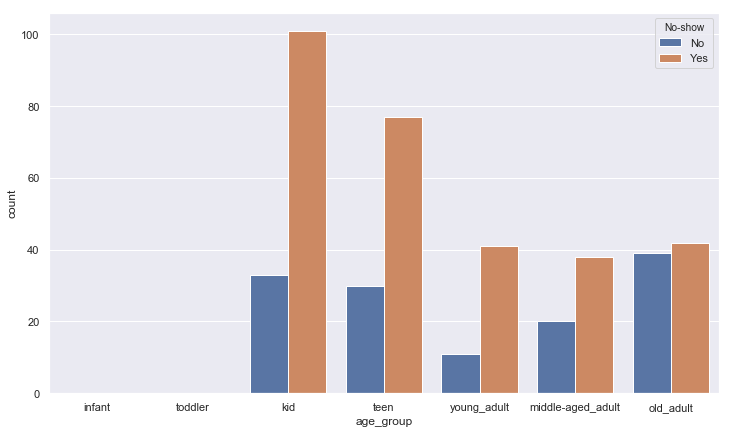

In [36]:
sns.set(style="darkgrid")
ax = sns.countplot(x="age_group",hue='No-show', data=top30_no_shows)
fig = plt.gcf()
fig.set_size_inches( 12, 7)

> The kids constitutes the maximum percentage in the top 30 no-shows. 
* bringing up a plan to support the old_adult and kids by providing them home service or hospital pick-drop service can help drop this ratio and also provide a proper health care to the age groups. 
* for the kids, the availability of their parents could also be one of the causes for the no-shows

In [48]:
#encode gender and no-shows to understand the correlation
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
data.iloc[:, 2] = labelencoder_X.fit_transform(data.iloc[:, 2])
data.iloc[:, 13] = labelencoder_X.fit_transform(data.iloc[:, 13])

In [49]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month,age_group
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016,4,old_adult
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016,4,old_adult
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016,4,old_adult
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016,4,kid
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016,4,old_adult


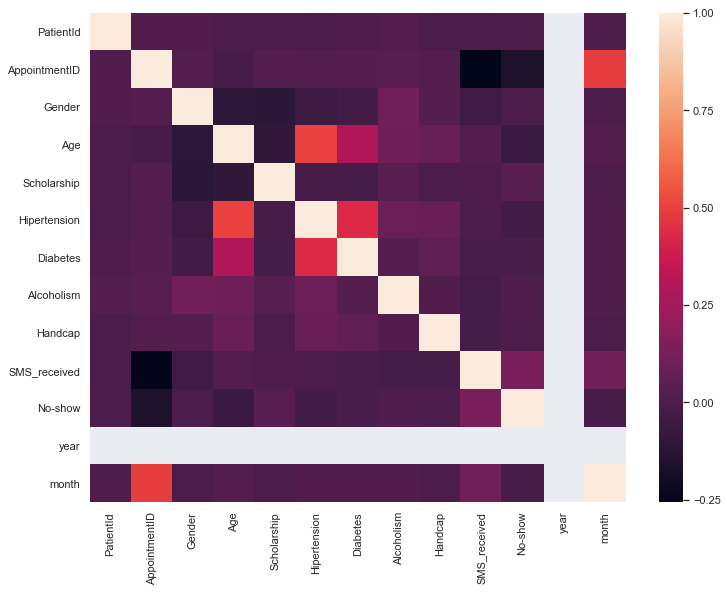

In [50]:
corr = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr)

>We observe a high correlation between hipertension and age, and also hipertension with diabetes. With the help of more medical records we can draw further relations between patients with hipertension and their age.

### Question 2: Does no-show have to do anything with the appointment month or the neighborhood of the hospital?

In [51]:
#get all showed-up appointments data
no_show_data = data[data['No-show']==1]

In [52]:
no_show_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month,age_group
6,7.336882e+14,5630279,0,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1,2016,4,young_adult
7,3.449833e+12,5630575,0,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1,2016,4,middle-aged_adult
11,7.542951e+12,5620163,1,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,2016,4,young_adult
17,1.479497e+13,5633460,0,2016-04-28 09:28:57,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,1,2016,4,middle-aged_adult
20,6.222575e+14,5626083,0,2016-04-27 07:51:14,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,1,2016,4,young_adult


In [53]:
#group by month and calculate the % of no-show appointments for each month
no_show_ratio = (no_show_data.groupby('month')['No-show'].count()/
                 data.groupby('month')['No-show'].count())

In [54]:
#get the data to dataframe
no_show_ratio = pd.DataFrame(no_show_ratio).reset_index()

In [55]:
no_show_ratio.head()

,month,No-show
0,4,0.195672
1,5,0.207865
2,6,0.184575


> From this data, the month of May has maximum no-shows. We should have at least two cycles of data to affirm that the month of May has maximum % of no-shows. 
>Further, this no-shows could be because of weather conditions 


>Looking into neighborhood and no-show  

In [56]:
#extracting count of no-show appointments for each neighborhood
neigh_no_show_ratio = (no_show_data.groupby('Neighbourhood')['No-show'].count()/
                 data.groupby('Neighbourhood')['No-show'].count())

In [57]:
#convert to dataframe
neigh_no_show_ratio = pd.DataFrame(neigh_no_show_ratio).reset_index()

In [58]:
#10 highest no-show appointments were recorded in the following neighborhood
neigh_no_show_ratio.nlargest(10, 'No-show')

,Neighbourhood,No-show
34,ILHAS OCEÂNICAS DE TRINDADE,1.000000
70,SANTOS DUMONT,0.289185
61,SANTA CECÍLIA,0.274554
62,SANTA CLARA,0.264822
36,ITARARÉ,0.262664
40,JESUS DE NAZARETH,0.243954
28,HORTO,0.240000
33,ILHA DO PRÍNCIPE,0.234775
9,CARATOÍRA,0.230409
1,ANDORINHAS,0.230327


In [61]:
#checking ILHAS OCEÂNICAS DE TRINDADE neighborhood
data_neighbourhood_ilhas = data[data['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']

In [63]:
data_neighbourhood_ilhas 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,year,month,age_group
48754,5.349869e+11,5583947,0,2016-04-14 12:25:43,2016-05-13,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,2016,5,old_adult
48765,7.256430e+12,5583948,0,2016-04-14 12:26:13,2016-05-13,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,2016,5,old_adult


#### Conclusion for second question-

ILHAS OCEÂNICAS DE TRINDADE neighborhood had only two appointments and both ended up in no-show appointments. Also, both the appointments were for the same day. We cannot conclusively say anything about this location. We need more data for this location to understand the behavior of patients visiting the hospital. Also, we should collect information about the hospital in order to check if they have proper facilities including doctors and nurses.

Following that, Santos Dumont have the highest rate of no-show appointment. It can be because of 
* the particular type of condition that the people ther suffer 
* the weather  
* the more young adult population there who are occupied with their work schedules
* or because of the old people, their conditions and no one to support them to the hospital appointment

<a id='conclusions'></a>
## Conclusions

>We can further ask questions like 
* which gender has the highest rate of not showing up?
* does a certain medical condition patient tend to not show up often comapred to the other conditions or combination of conditions?
* do people with no scholarship tend to not show-up for the appointment?

> With more data we can predict the patients behavior and also the weather and other external factors affecting the no-show in the hospitals and reduce the no-show ratios.